In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

<IPython.core.display.Javascript object>


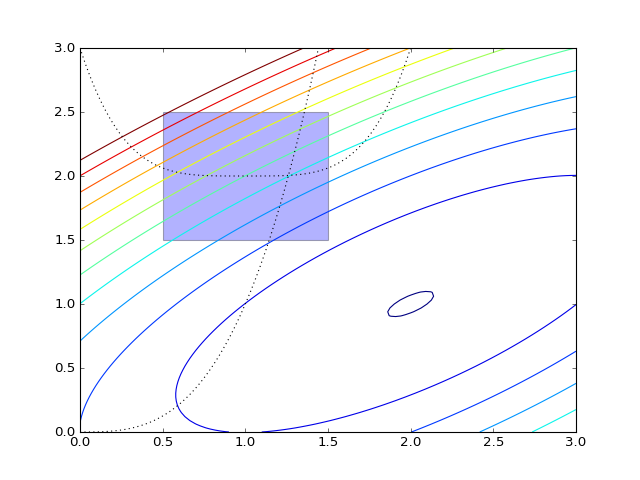

In [3]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);

In [4]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [5]:
x0 = [0, 2.5]

In [6]:
res1 = minimize(f, x0, constraints=None)
res2 = minimize(f, x0, bounds=bnds, constraints=cons)

In [7]:
print res1
print res2

      fun: -1.9999999999996365
 hess_inv: array([[ 0.99829115,  0.50105608],
       [ 0.50105608,  0.4993548 ]])
      jac: array([  1.25169754e-06,  -1.41561031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 2.00000043,  0.99999985])
     fun: 2.0499154720910759
     jac: array([-3.48747861,  5.49674439,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.26089314,  2.00463288])


<IPython.core.display.Javascript object>


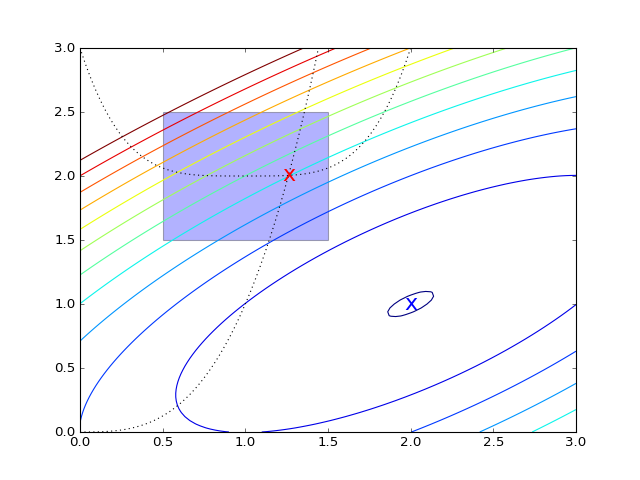

In [8]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.figure()
plt.contour(X, Y, Z, np.arange(-1.99,10, 1))
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(res1['x'][0], res1['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(res2['x'][0], res2['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);

$$ \text{min } q(x) = (x_1 - 1)^2 + (x_2 - 2.5)^2 $$
$$ x_1 - 2 x_2 + 2 \geq 0 $$
$$ -x_1 - 2 x_2 + 6 \geq 0 $$
$$ -x_1 + 2 x_2 + 2 \geq 0 $$
$$ x_1 \geq 0 $$
$$ x_2 \geq 0 $$

Objective function

In [9]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

Constraints and Bounds (variables must be positive)

In [10]:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))

In [11]:
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)

In [12]:
res.x

array([ 1.4,  1.7])